In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split


In [2]:
import numpy as np

In [3]:
dataset = pd.read_csv(r"E:\Machine Learning\lasso_ridge_relgularization\car-mpg.csv")


In [4]:
dataset.dropna(inplace=True)

In [5]:
dataset.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [6]:
# drop carname
# replace origin 1,2,3 with ...don't forget to get dummies
# replace ? with nan
# replace all the nan with median

dataset = dataset.drop(['car_name'], axis = 1)
dataset['origin'] = dataset['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
dataset = pd.get_dummies(dataset,columns = ['origin'])
dataset = dataset.replace('?', np.nan)
dataset = dataset.apply(lambda x: x.fillna(x.median()) if x.dtype != 'O' else x, axis=0)


In [7]:
dataset.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,True,False,False
1,15.0,8,350.0,165,3693,11.5,70,0,True,False,False
2,18.0,8,318.0,150,3436,11.0,70,0,True,False,False
3,16.0,8,304.0,150,3433,12.0,70,0,True,False,False
4,17.0,8,302.0,140,3449,10.5,70,0,True,False,False


In [8]:
dataset[['origin_america', 'origin_asia', 'origin_europe']] = dataset[['origin_america', 'origin_asia', 'origin_europe']].astype(int)


In [9]:
dataset.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0


-- mpg coloumn has to predicted from dataset 
-- dependent variable -- > mpg

In [10]:
type(dataset)

pandas.core.frame.DataFrame

MODEL BUILDING 

-- Here we would like to scale the data as the columns are varied which would result in 1 column dominating others

-- Firstly we devide dataset into independent(X) and dependent (Y)

NOTE: The reason we don't scale entire data before and then devide into train(X) and test_y is because once you scale the data it will be converted to numpy.ndarray. it's impossible to devide the data when it's  an array.

Hence we divide  type(data) pandas.DataFrame , Then proceed to scaling.

In [11]:
# lets split dataset into x and y

In [12]:
X = dataset.drop(['mpg'],axis=1)
y = dataset['mpg']

In [14]:
X.head()

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,8,307.0,130,3504,12.0,70,0,1,0,0
1,8,350.0,165,3693,11.5,70,0,1,0,0
2,8,318.0,150,3436,11.0,70,0,1,0,0
3,8,304.0,150,3433,12.0,70,0,1,0,0
4,8,302.0,140,3449,10.5,70,0,1,0,0


In [15]:
X.tail()

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
393,4,140.0,86,2790,15.6,82,1,1,0,0
394,4,97.0,52,2130,24.6,82,1,0,0,1
395,4,135.0,84,2295,11.6,82,1,1,0,0
396,4,120.0,79,2625,18.6,82,1,1,0,0
397,4,119.0,82,2720,19.4,82,1,1,0,0


In [16]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [17]:
print(type(y))

<class 'pandas.core.series.Series'>


In [18]:
X_s = preprocessing.scale(X)
X_s = pd.DataFrame(X_s,columns=X.columns) # converting scaled data into Dataframe 

y_s = preprocessing.scale(y)
y_s = pd.DataFrame(y_s,columns=['mpg']) # converting scaled data into Dataframe

In [19]:
# split the data into phases

X_train,X_test,y_train,y_test = train_test_split(X_s,y_s,test_size=0.30,random_state=1)
X_train.shape

(278, 10)

# Simple Linear Model

In [20]:
print(X_train.isna().sum())
print(y_train.isna().sum())

cyl               0
disp              0
hp                5
wt                0
acc               0
yr                0
car_type          0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64
mpg    0
dtype: int64


In [21]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # Ensure y_train matches X_train's index


In [23]:
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]  # Ensure y_train matches X_train's index


In [29]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

for idx,col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name, regressor.coef_[0][idx]))
    
intercept = regressor.intercept_[0]
print('The intercept is  {}'.format(intercept))


The coefficient for cyl is 0.3103410997079567
The coefficient for disp is 0.32047798498844504
The coefficient for hp is -0.25656465602875606
The coefficient for wt is -0.6689748456780276
The coefficient for acc is 0.00631075782429142
The coefficient for yr is 0.3733609559016758
The coefficient for car_type is 0.3932127763086909
The coefficient for origin_america is -0.07080211752146236
The coefficient for origin_asia is 0.047190951581298574
The coefficient for origin_europe is 0.04056183098702132
The intercept is  0.017387809190335786


# Regularized Ridge Regression

In [24]:
#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff

ridge_model = Ridge(alpha=3.0)
ridge_model.fit(X_train,y_train)


print('Ridge model coefficient: {}'.format(ridge_model.coef_))

# as the data has 10 columns hence 10 coefficients appear here


Ridge model coefficient: [[ 0.26322609  0.22997221 -0.24798963 -0.58891214 -0.00633128  0.36404587
   0.35390683 -0.06679829  0.04641126  0.03628911]]


# Regularized Lasso Regression

In [41]:
lasso_model = Lasso(alpha=0.1)
lasso_model = lasso_model.fit(X_train,y_train)

print('Ridge model coef: {}'.format(lasso_model.coef_))


Ridge model coef: [-0.         -0.         -0.03173269 -0.49574218  0.          0.28082297
  0.14447175 -0.00665008  0.          0.        ]


In [26]:
# model score r^2  or coeff of determinent
# r^2 = 1-SSR/SST (Sum of squary resgression/Sum of squary total)

# simple linear regression
print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))

print('*******************************')

print(ridge_model.score(X_train,y_train))
print(ridge_model.score(X_test,y_test))

print('********************************')

print(lasso_model.score(X_train,y_train))
print(lasso_model.score(X_test,y_test))

0.8359398616204183
0.849495976676595
*******************************
0.8348576000437783
0.8529413003395429
********************************
0.7960642072686119
0.8348380060373659


# Model Parameter Tuning

* r^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no influence on the predicted variable. Instead we use adjusted r^2 which removes the statistical chance that improves r^2 

(adjusted r^2 = r^2 - fluke)
* Scikit does not provide a facility for adjusted r^2... so we use statsmodel, a library that gives results similar to what you obtain in R language
* This library expects the X and Y to be given in one single dataframe

In [31]:
data_train_test = pd.concat([X_train,y_train],axis=1)
data_train_test

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe,mpg
350,-0.856321,-0.849116,-1.078751,-0.893172,-0.242570,1.351199,0.941412,0.773559,-0.497643,-0.461968,1.432898
59,-0.856321,-0.925936,-1.312870,-0.847061,2.879909,-1.085858,0.941412,-1.292726,-0.497643,2.164651,-0.065919
120,-0.856321,-0.695475,0.195895,-0.121101,-0.024722,-0.815074,0.941412,-1.292726,-0.497643,2.164651,-0.578335
12,1.498191,1.983643,1.184397,0.934732,-2.203196,-1.627426,-1.062235,0.773559,-0.497643,-0.461968,-1.090751
349,-0.856321,-0.983552,-0.948685,-1.165111,0.156817,1.351199,0.941412,-1.292726,2.009471,-0.461968,1.356035
...,...,...,...,...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.480448,-0.213324,0.011586,1.621983,0.941412,0.773559,-0.497643,-0.461968,0.446497
255,-0.856321,-0.513026,-0.428421,-0.296088,-0.061030,0.538847,0.941412,0.773559,-0.497643,-0.461968,0.203100
72,1.498191,1.061796,1.184397,1.089620,-1.113959,-1.085858,-1.062235,0.773559,-0.497643,-0.461968,-1.090751
235,-0.856321,-0.925936,-0.766593,-0.834055,0.955591,0.268063,0.941412,-1.292726,2.009471,-0.461968,0.318393


In [34]:
import statsmodels.formula.api as smf
ols1 = smf.ols(formula = 'mpg ~ cyl+disp+hp+wt+acc+yr+car_type+origin_america+origin_europe+origin_asia', data = data_train_test).fit()
ols1.params

Intercept         0.017388
cyl               0.310341
disp              0.320478
hp               -0.256565
wt               -0.668975
acc               0.006311
yr                0.373361
car_type          0.393213
origin_america   -0.070802
origin_europe     0.040562
origin_asia       0.047191
dtype: float64

In [35]:
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     148.9
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           7.57e-98
Time:                        20:15:52   Log-Likelihood:                -142.96
No. Observations:                 273   AIC:                             305.9
Df Residuals:                     263   BIC:                             342.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0174      0.025      0.

In [37]:
#Lets check Sum of Squared Errors (SSE) by predicting value of y for test cases and subtracting from the actual y for the test cases
mse  = np.mean((regressor.predict(X_test)-y_test)**2)

# root of mean_sq_error is standard deviation i.e. avg variance between predicted and actual
import math
rmse = math.sqrt(mse)
print('Root Mean Squared Error: {}'.format(rmse))

Root Mean Squared Error: 0.3781541991633671


<Axes: xlabel='acc', ylabel='mpg'>

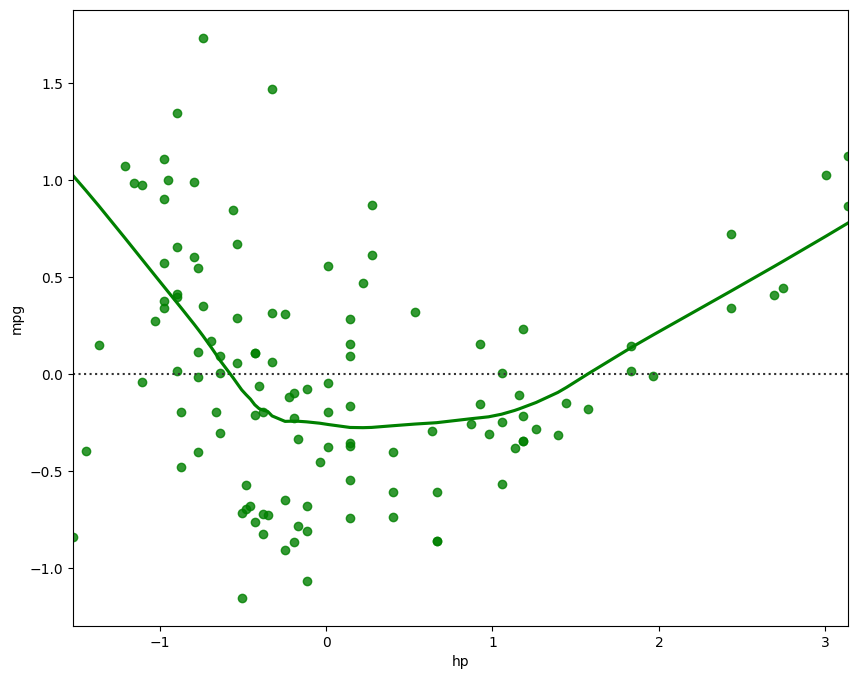

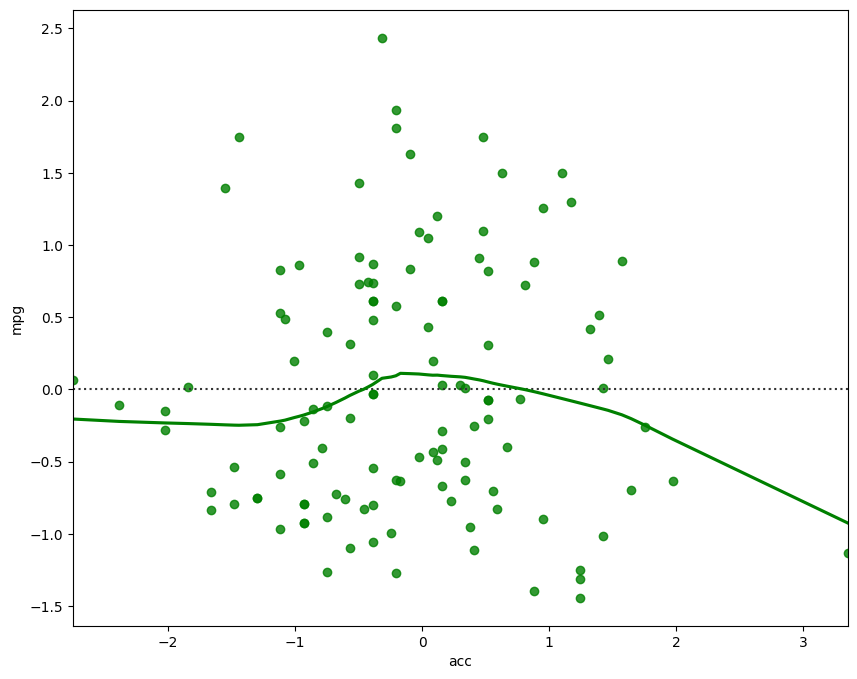

In [38]:
# Is OLS a good model ? Lets check the residuals for some of these predictor.
import seaborn as sns
fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['hp'], y= y_test['mpg'], color='green', lowess=True )


fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['acc'], y= y_test['mpg'], color='green', lowess=True )

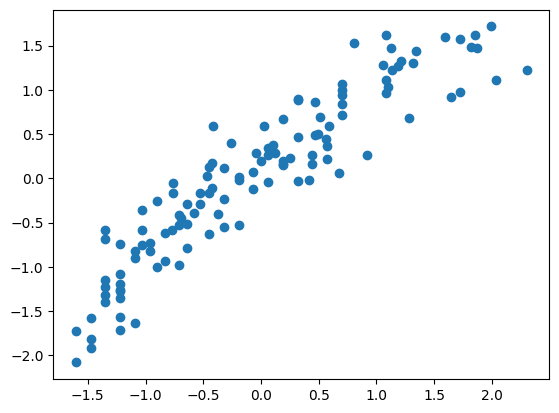

In [40]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regressor.predict(X_test)

# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500
plt.scatter(y_test['mpg'], y_pred)